# Application Data Report

In [1]:
# import warnings
# warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.dates as mdates

In [3]:
df = pd.read_csv('dataset.csv')

In [4]:
# Convert column to datetime

df['summary_date'] = pd.to_datetime(df['summary_date'])

In [5]:
# metric total calculations
total_results = df.groupby('campaign_name').agg(impressions = ('impressions','sum'),
                                clicks = ('clicks', 'sum'),
                                installs = ('installs', 'sum'),
                                spend = ('spend', 'sum')
                               )

total_results['ctr'] = total_results['clicks'] / total_results['impressions'] 
total_results['cpi'] = total_results['spend'] / total_results['installs'] 
total_results.fillna(0, inplace=True)

In [6]:
# metric summary_date calculations
cols = ['summary_date', 'app_type', 'app_name', 'campaign_name', 'impressions','clicks', 'installs', 'spend']


summary_dates_results = df[cols].groupby(['summary_date', 'campaign_name']).agg(impressions = ('impressions','sum'),
                                clicks = ('clicks', 'sum'),
                                installs = ('installs', 'sum'),
                                spend = ('spend', 'sum')
                               )

summary_dates_results['ctr'] = summary_dates_results['clicks'] / summary_dates_results['impressions'] 
summary_dates_results['cpi'] = summary_dates_results['spend'] / summary_dates_results['installs'] 
summary_dates_results.fillna(0, inplace=True)

summary_dates_results.replace([np.inf, -np.inf], 0, inplace=True)
summary_dates_results.reset_index(inplace=True)

In [7]:
# Formatter functions

def percentage_formatter(x, pos):
    return f'{x:.0%}'

def dollars_formatter(x, pos):
    return f'${x:,.0f}'

# Performance Report

### Key Observations:

Highest Impressions: Super campaign 16 (245,177,026 impressions)

Highest Clicks: Super campaign 10 (5,429,764 clicks)

Highest Installs: Super campaign 9 (541,224 installs)

Highest Spend: Super campaign 10 (USD 57,194.67)

Highest CTR (Click-through Rate): Super campaign 16 (0.87%)

Lowest CPI (Cost per Install): Super campaign 10 (USD 0.27)

Todo esto supongo que está automatizado ;-)

In [8]:
total_results

,impressions,clicks,installs,spend,ctr,cpi
campaign_name,,,,,,
Super campaign 10,0.0,5429764.0,213682.0,57194.6700,inf,0.267663
Super campaign 13,0.0,0.0,2.0,0.0000,0.000000,0.000000
Super campaign 16,245177026.0,2132984.0,28776.0,18314.5937,0.008700,0.636454
Super campaign 4,0.0,0.0,26.0,0.0000,0.000000,0.000000
Super campaign 5,0.0,0.0,1072.0,0.0000,0.000000,0.000000
Super campaign 6,95681244.0,847818.0,3776.0,1422.1974,0.008861,0.376641
Super campaign 9,0.0,0.0,541224.0,0.0000,0.000000,0.000000


Despite **"Super Campaign 6"** having significantly fewer impressions compared to "Super Campaign 16", it maintains a comparable CTR... 

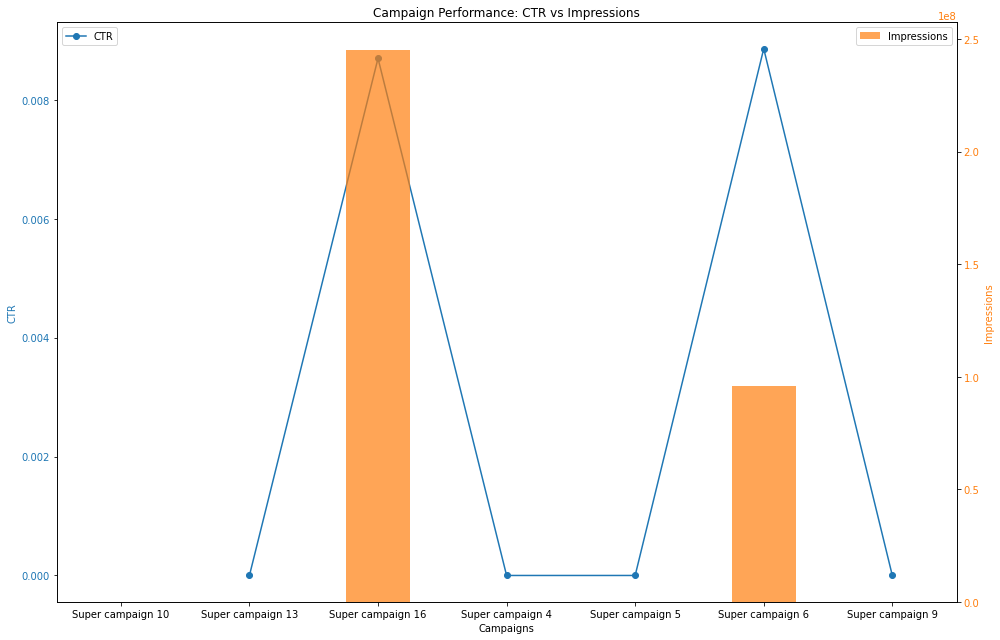

In [9]:
fig, ax1 = plt.subplots(figsize=(14, 9))

total_results['ctr'].plot(ax=ax1, color='tab:blue', linestyle='-', marker='o', label='CTR')
ax1.set_xlabel('Campaigns')
ax1.set_ylabel('CTR', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# plt.gca().yaxis.set_major_formatter(FuncFormatter(percentage_formatter))

ax2 = ax1.twinx()

total_results['impressions'].plot(kind='bar', ax=ax2, color='tab:orange', alpha=0.7, label='Impressions')
ax2.set_ylabel('Impressions', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')


ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('Campaign Performance: CTR vs Impressions')

plt.tight_layout()
plt.show()

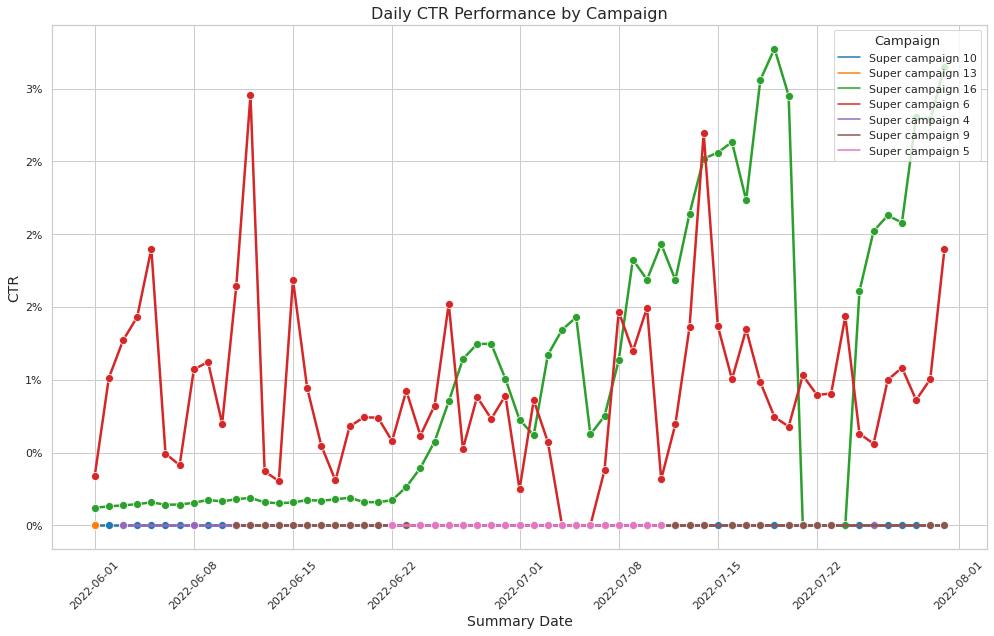

In [10]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(14, 9))

sns.lineplot(data=summary_dates_results, x="summary_date", y="ctr", hue='campaign_name',
             palette="tab10", linewidth=2.5, markers=True, markersize=8, marker='o')

def percentage_formatter(x, pos):
    return f'{x:.0%}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(percentage_formatter))

date_format = mdates.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(date_format)

plt.title('Daily CTR Performance by Campaign', fontsize=16)
plt.xlabel('Summary Date', fontsize=14)
plt.ylabel('CTR', fontsize=14)

plt.legend(title='Campaign', title_fontsize='13', loc='upper right', fontsize='11')  # Leyenda


plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


...and a CPI that falls between the values of Campaigns 10 and 6. While it did not drive a high volume of installations, it exhibits very strong performance.

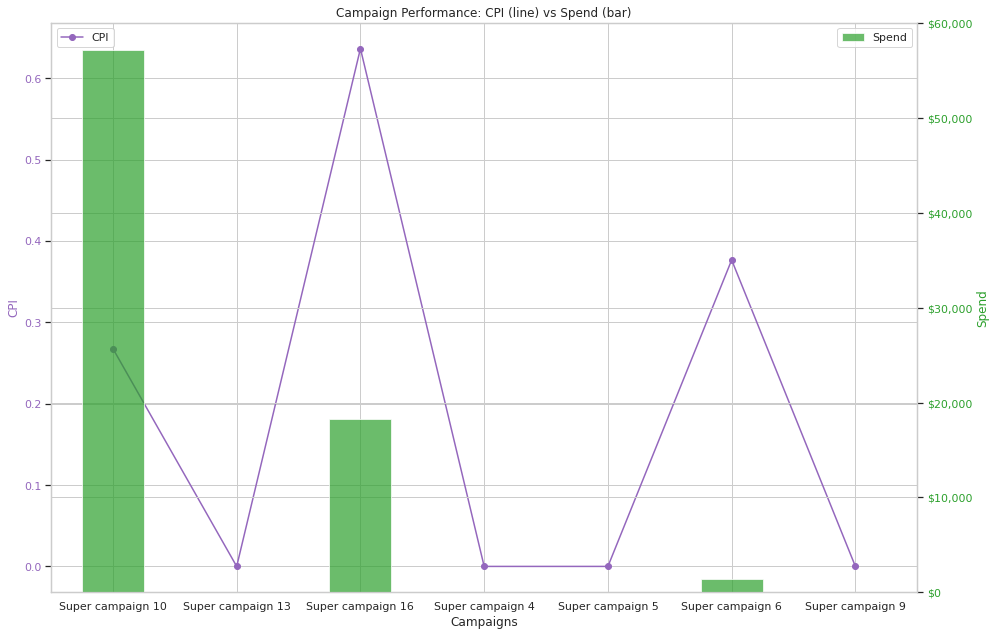

In [11]:
fig, ax1 = plt.subplots(figsize=(14, 9))

total_results['cpi'].plot(ax=ax1, color='tab:purple', linestyle='-', marker='o', label='CPI')
ax1.set_xlabel('Campaigns')
ax1.set_ylabel('CPI', color='tab:purple')
ax1.tick_params(axis='y', labelcolor='tab:purple')

ax2 = ax1.twinx()

plt.gca().yaxis.set_major_formatter(FuncFormatter(dollars_formatter))


total_results['spend'].plot(kind='bar', ax=ax2, color='tab:green', alpha=0.7, label='Spend')
ax2.set_ylabel('Spend', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')


ax1.legend(loc='upper left') 
ax2.legend(loc='upper right')
plt.title('Campaign Performance: CPI (line) vs Spend (bar)')

plt.tight_layout()
plt.show() 

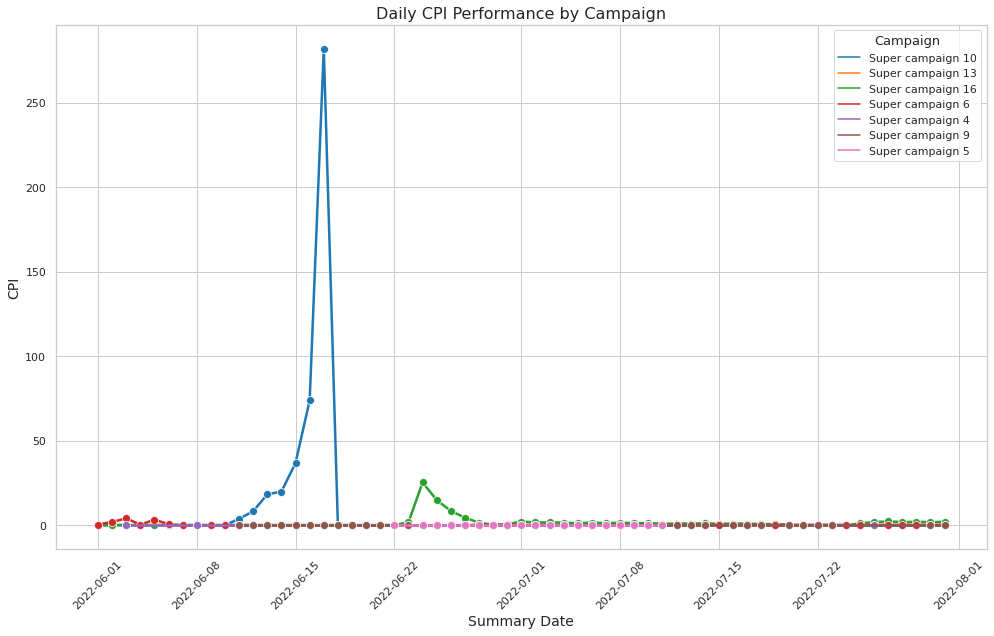

In [12]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(14, 9))

sns.lineplot(data=summary_dates_results, x=summary_dates_results["summary_date"].dt.date, y="cpi", hue='campaign_name',
             palette="tab10", linewidth=2.5, markers=True, markersize=8, marker='o')

date_format = mdates.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(date_format)

plt.title('Daily CPI Performance by Campaign', fontsize=16)
plt.xlabel('Summary Date', fontsize=14)
plt.ylabel('CPI', fontsize=14)

plt.legend(title='Campaign', title_fontsize='13', loc='upper right', fontsize='11')  # Leyenda

plt.grid(True) 
plt.xticks(rotation=45) 
plt.tight_layout()

plt.show()

In [13]:
# Generate nice HTML 
!jupyter nbconvert --to slides application_data_report.ipynb --TemplateExporter.exclude_input=True

[NbConvertApp] Converting notebook application_data_report.ipynb to slides
[NbConvertApp] Writing 603147 bytes to application_data_report.slides.html
